# Árvores de decisão

Árvores de decisão (DTs) são um método de aprendizagem supervisionada não paramétrico usado para classificação e regressão.

O objetivo deste notebook é criar um modelo que prevê o valor de uma variável de destino, aprendendo regras de decisão simples inferidas a partir dos recursos de dados.

In [1]:
from sklearn.datasets import make_regression
from sklearn import tree
import graphviz
import os

## Gerar um dataset

In [2]:
n_samples = 100
n_features = 10

In [3]:
X, y = make_regression(n_samples=100, n_features=10)

## Classificar

In [4]:
clf = tree.DecisionTreeRegressor()
clf = clf.fit(X, y)

In [5]:
clf

DecisionTreeRegressor()

## Mostrando o resultado

In [6]:
dot_data = tree.export_graphviz(clf, out_file=None) 
graph = graphviz.Source(dot_data)

filename = "arvore-regression"
graph.render(filename=filename)

'arvore-regression.pdf'

In [7]:
from IPython.display import IFrame
IFrame("%s.pdf" % os.path.basename(filename), width=1200, height=300)

## Mostrando o graph gerado pela árvore de decisão

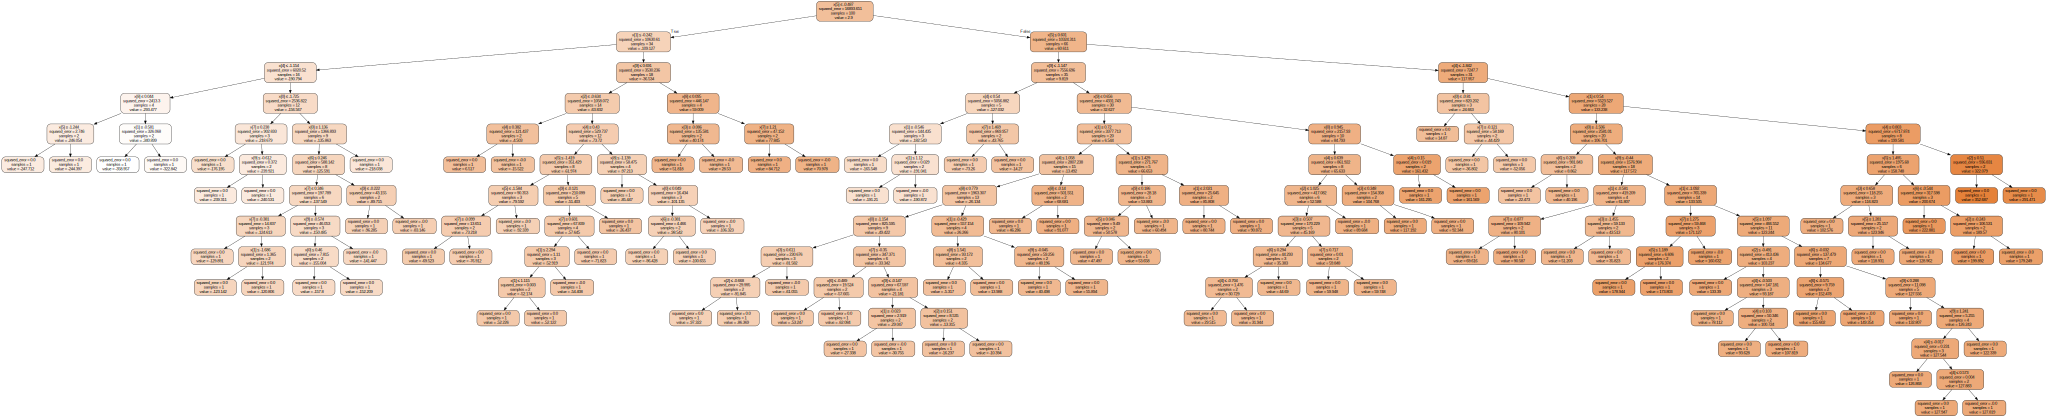

In [8]:
dot_data = tree.export_graphviz(
    clf, 
    out_file=None, 
    feature_names=[f"x[{i}]" for i in range(X.shape[1])],  
    class_names=["value"],  
    filled=True, rounded=True,  
    special_characters=True
)  
graph = graphviz.Source(dot_data)  
graph 

## Usando para prever um valor

In [9]:
x0 = X[:1, :]  # valor considerar a primeira linha dos nossos dados
print(x0)

[[-1.58531883 -1.06657953  0.47171939  0.75083417 -0.28169695  0.75565374
   0.21575426  0.20114337  0.67697942  0.73449181]]


In [10]:
y0 = clf.predict(x0)
print(y0)

[40.19608907]


## qual a probabilidade para o valor

- esta opção irá gerar um erro pois somente obtemos probabilidades quando estamos efetuando classificação.

In [11]:
clf.predict_proba(x0)

AttributeError: 'DecisionTreeRegressor' object has no attribute 'predict_proba'